In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
# preprocessing
import re
import string
import nltk
from nltk import  pos_tag
from nltk.corpus import stopwords
import nltk.stem as stemmer

from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec


from collections import Counter
# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report



In [2]:
#read data
dataset= pd.read_csv('gossipcop.csv')
dataset

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0.0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0.0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0.0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0.0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0.0
...,...,...,...,...,...
6136,gossipcop-858862,http://time.com/4805251/ariana-grande-manchest...,Ariana Grande Manchester Concert Raised $13 Mi...,871451309240700929\t871451512756514816\t871451...,1.0
6137,gossipcop-867683,https://www.etonline.com/tv/221790_veronica_ma...,Kristen Bell's 'Veronica Mars' Co-Star Ryan Ha...,887419435761491969\t887419754046271488\t887420...,1.0
6138,gossipcop-938801,https://www.etonline.com/will-smith-addresses-...,Will Smith Addresses Jada Pinkett Divorce Rumo...,999629011478286336\t999629360352153601\t999629...,1.0
6139,gossipcop-921110,https://www.dailymail.co.uk/tvshowbiz/article-...,Arie Luyendyk Jr and Lauren Burnham enjoy $25K...,974479918330466306\t974479941587931141\t974480...,1.0


In [3]:
#rename the title column to news
dataset.rename(columns= {'title': 'news'}, inplace= True)

In [4]:
df= dataset[['news']]
label= dataset[['label']]
other_features= dataset.drop(['news', 'label'], axis= 1)
df.head(3)

,news
0,Did Miley Cyrus and Liam Hemsworth secretly ge...
1,Paris Jackson & Cara Delevingne Enjoy Night Ou...
2,Celebrities Join Tax March in Protest of Donal...


In [ ]:
# cleanning dataset

In [5]:
def remove_URL(text):
  url= re.compile(r'https?://\S+|www\.|S+')
  return url.sub(r"", text)

In [6]:
def remove_punctuation(text):
  trnsltr= str.maketrans("","", string.punctuation)
  return text.translate(trnsltr)

In [7]:
df['news']= df.news.map(remove_punctuation)
df['news']= df.news.map(remove_URL)

<ipython-input-7-a35a6abdf14c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news']= df.news.map(remove_punctuation)
<ipython-input-7-a35a6abdf14c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news']= df.news.map(remove_URL)


In [ ]:
#remove stop words

In [8]:
nltk.download('stopwords')
stop= set(stopwords.words("english"))
def remove_stopwords(text):
  result= [word.lower() for word in text.split() if word.lower() not in stop]
  return ' '.join(result)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df['news']= df.news.map(remove_stopwords)

<ipython-input-9-b1b16693267d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news']= df.news.map(remove_stopwords)


In [10]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()

pos= pos_tag(df['news'])
df['news'] = [stemmer.stem(tagged_word[0]) for tagged_word in pos]



<ipython-input-11-75a18c877c3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news'] = [stemmer.stem(tagged_word[0]) for tagged_word in pos]


In [12]:
df

,news
0,miley cyrus liam hemsworth secretly get marri
1,paris jackson cara delevingne enjoy night matc...
2,celebrities join tax march protest donald trump
3,cindy crawfords daughter kaia gerber wears wig...
4,full list 2018 oscar nominations – varieti
...,...
6136,ariana grande manchester concert raised 13 mil...
6137,kristen bells veronica mars cotar ryan hansen ...
6138,mith addresses jada pinkett divorce rumors new...
6139,arie luyendyk jr lauren burnham enjoy 25k barc...


In [13]:
# counting unique words of news column
def count_words(text_col):
  counter= Counter()
  for text in text_col:
    for word in text.split():
      counter[word] += 1
  return counter


In [14]:
counter= count_words(df['news'])

In [15]:
# number of unique words
len(counter)

10185

In [16]:
unique_words_num= len(counter)

In [43]:
embedding_dim= 100

In [17]:
X= [x.split() for x in df['news'].tolist()]

In [18]:
print(most_common:= counter.most_common(5))

[('jennifer', 490), ('kardashian', 464), ('brad', 411), ('justin', 367), ('pitt', 352)]


In [19]:
# vectorize a text into a sequence of integers by tokenizing
# converting text into a sequence of integers
def tokenize(text):
  tokenizer= Tokenizer(num_words= unique_words_num)
  tokenizer.fit_on_texts(text)
  return tokenizer

In [20]:
tokenizer= tokenize(X)


In [21]:
print(word_index:= tokenizer.word_index)

{'jennifer': 1, 'kardashian': 2, 'brad': 3, 'justin': 4, 'pitt': 5, 'jenner': 6, 'new': 7, 'kim': 8, 'angelina': 9, 'report': 10, 'elena': 11, 'aniston': 12, 'meghan': 13, 'gomez': 14, 'jolie': 15, 'baby': 16, 'blake': 17, 'prince': 18, '—': 19, 'kylie': 20, 'bieber': 21, 'kanye': 22, 'gwen': 23, 'helton': 24, 'markle': 25, 'cott': 26, 'tefani': 27, 'wedding': 28, 'taylor': 29, 'west': 30, 'relationship': 31, 'harry': 32, 'dating': 33, '–': 34, 'kate': 35, 'reportedly': 36, 'despite': 37, 'katie': 38, 'back': 39, 'divorce': 40, 'plit': 41, 'wift': 42, 'caitlyn': 43, 'trump': 44, 'pregnant': 45, 'ben': 46, 'holmes': 47, 'jamie': 48, 'robert': 49, 'theroux': 50, 'khloe': 51, 'first': 52, 'rumors': 53, 'kourtney': 54, 'tom': 55, 'chris': 56, 'rumor': 57, 'affleck': 58, '2018': 59, 'get': 60, 'exclu': 61, 'royal': 62, 'pattinson': 63, 'celebrities': 64, 'ays': 65, 'ex': 66, 'middleton': 67, 'ecret': 68, 'marriage': 69, 'family': 70, 'lopez': 71, 'wants': 72, 'he’s': 73, 'love': 74, 'foxx':

In [22]:
tokenizer.word_counts

OrderedDict([('miley', 65),
             ('cyrus', 65),
             ('liam', 62),
             ('hemsworth', 47),
             ('secretly', 4),
             ('get', 91),
             ('marri', 20),
             ('paris', 48),
             ('jackson', 44),
             ('cara', 8),
             ('delevingne', 8),
             ('enjoy', 11),
             ('night', 45),
             ('matching', 6),
             ('outfits', 2),
             ('‘amazing', 3),
             ('chemistry’', 1),
             ('celebrities', 87),
             ('join', 13),
             ('tax', 2),
             ('march', 8),
             ('protest', 7),
             ('donald', 63),
             ('trump', 118),
             ('cindy', 11),
             ('crawfords', 3),
             ('daughter', 47),
             ('kaia', 10),
             ('gerber', 8),
             ('wears', 13),
             ('wig', 2),
             ('dining', 2),
             ('harry', 141),
             ('tyl', 6),
             ('full', 17),
 

In [23]:
text_sentences= df['news'].to_numpy()
text_sequences= tokenizer.texts_to_sequences(X)


In [24]:
print(text_sentences[100])
print(text_sequences[100])

throwback alert relive pippa middletons cenetealing appearance kate middletons wed
[2390, 1606, 3175, 580, 1046, 4770, 1607, 35, 1046, 114]


In [25]:
#reversing tokenization
# test_sequences

In [26]:
# min and max lengh of train sequences
train_min_lenght= len(min(text_sequences, key= len))
train_max_lenght= len(max(text_sequences, key= len))
train_min_lenght , train_max_lenght


(1, 20)

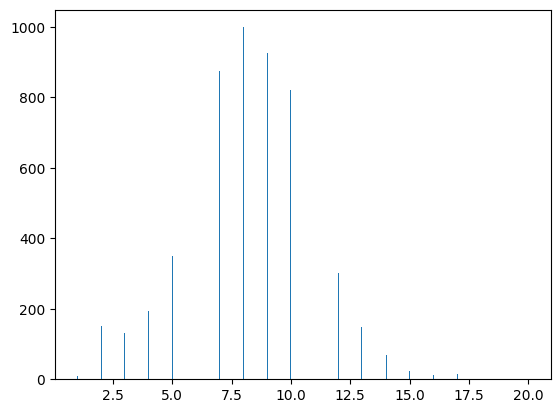

In [27]:
# plotting len of each sentence
plt.hist([len(x) for x in X], bins=500);

In [29]:
sentence_len= np.array([len(x) for x in X])
print(f'There are {len(sentence_len[sentence_len > 15])} sentences which have more than 25 words.')
max_len= 15

There are 32 sentences which have more than 25 words.


In [30]:
# padding
def padding_sequences(seq, max_len):
  return pad_sequences(seq, maxlen= max_len, padding= "post", truncating="post")

In [31]:
text_padded= padding_sequences(text_sequences, max_len)

In [32]:
print(text_sentences[100])
print(text_sequences[100])
print(text_padded[100])

throwback alert relive pippa middletons cenetealing appearance kate middletons wed
[2390, 1606, 3175, 580, 1046, 4770, 1607, 35, 1046, 114]
[2390 1606 3175  580 1046 4770 1607   35 1046  114    0    0    0    0
    0]


In [34]:
# checking tokenization by reversing from sequences to sentences
# filp word_index dictionay index and value
reversed_index= dict([(idx, word) for (word, idx) in word_index.items()])

In [35]:
def decode(seq):
  result= " ".join([reversed_index.get(idx, "?") for idx in seq])
  return result

In [36]:
decoded_news= decode(text_sequences[100])
print(text_sequences[100])
print(text_sentences[100])
print(decoded_news)

[2390, 1606, 3175, 580, 1046, 4770, 1607, 35, 1046, 114]
throwback alert relive pippa middletons cenetealing appearance kate middletons wed
throwback alert relive pippa middletons cenetealing appearance kate middletons wed


In [37]:
#concatinating other features to tokenized data

In [38]:
##### concatnate if other features exist
# train_padded= np.hstack([train_padded, train_other_features])
# test_padded= np.hstack([test_padded, test_other_features])


In [39]:
# unique_words_num
# other_feauter_lengh= test_other_features.shape[1]
# other_feauter_lengh

In [40]:
# vocab_size
vocab_size= len(tokenizer.word_index) +1 # because word_index starts from zero

In [41]:
X_train, X_test, y_train, y_test= train_test_split(text_padded, label, test_size= 0.2, random_state= 10)

In [44]:

# create LSTM model
model= keras.models.Sequential()
model.add(layers.Embedding(unique_words_num, embedding_dim, input_length=max_len))
model.add(layers.LSTM(128, dropout= 0.1))
model.add(layers.Dense(1,  activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           1018500   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,135,877
Trainable params: 1,135,877
Non-trainable params: 0
_________________________________________________________________


In [45]:
loss= keras.losses.BinaryCrossentropy(from_logits= False)
optim= keras.optimizers.Adam(learning_rate=0.005)
metrics= ["accuracy"]#,  Precision(), Recall()]
model.compile(loss= loss, optimizer= optim, metrics= metrics)

In [47]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)


Epoch 1/20
154/154 - 6s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 6s/epoch - 39ms/step
Epoch 2/20
154/154 - 3s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 3s/epoch - 16ms/step
Epoch 3/20
154/154 - 2s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 2s/epoch - 14ms/step
Epoch 4/20
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 1s/epoch - 9ms/step
Epoch 5/20
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 1s/epoch - 7ms/step
Epoch 6/20
154/154 - 2s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 2s/epoch - 10ms/step
Epoch 7/20
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 1s/epoch - 9ms/step
Epoch 8/20
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 1s/epoch - 10ms/step
Epoch 9/20
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: 

In [48]:
y_pred= (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

39/39 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1077
         1.0       0.00      0.00      0.00       152

    accuracy                           0.88      1229
   macro avg       0.44      0.50      0.47      1229
weighted avg       0.77      0.88      0.82      1229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Bidirectional LSTM

In [50]:
bi_model =  keras.models.Sequential()
bi_model.add(layers.Embedding(vocab_size, output_dim= embedding_dim,  input_length= max_len , trainable=False))
bi_model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.1)))  # Use Bidirectional LSTM layer
bi_model.add(layers.Dense(1, activation='sigmoid'))
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = ["accuracy"] #, Precision(), Recall()]

bi_model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [51]:
bi_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
154/154 - 6s - loss: nan - accuracy: 0.8396 - val_loss: nan - val_accuracy: 0.8763 - 6s/epoch - 42ms/step
Epoch 2/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 1s/epoch - 9ms/step
Epoch 3/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 1s/epoch - 9ms/step
Epoch 4/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 986ms/epoch - 6ms/step
Epoch 5/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 969ms/epoch - 6ms/step
Epoch 6/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 945ms/epoch - 6ms/step
Epoch 7/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 964ms/epoch - 6ms/step
Epoch 8/50
154/154 - 1s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 965ms/epoch - 6ms/step
Epoch 9/50
154/154 - 1s - loss: nan - accuracy: 0.8644 -

In [52]:
y_pred= (bi_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

39/39 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1077
         1.0       0.00      0.00      0.00       152

    accuracy                           0.88      1229
   macro avg       0.44      0.50      0.47      1229
weighted avg       0.77      0.88      0.82      1229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
S_model =  keras.models.Sequential()
S_model.add(layers.Embedding(vocab_size, output_dim= embedding_dim,  input_length= max_len , trainable=False))
S_model.add(layers.SimpleRNN(128, dropout=0.1))
S_model.add(layers.Dense(1, activation='sigmoid'))
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = ["accuracy"] #, Precision(), Recall()]

S_model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [54]:
S_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
154/154 - 5s - loss: nan - accuracy: 0.8601 - val_loss: nan - val_accuracy: 0.8763 - 5s/epoch - 30ms/step
Epoch 2/50
154/154 - 3s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 3s/epoch - 17ms/step
Epoch 3/50
154/154 - 4s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 4s/epoch - 24ms/step
Epoch 4/50
154/154 - 3s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 3s/epoch - 17ms/step
Epoch 5/50
154/154 - 4s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 4s/epoch - 23ms/step
Epoch 6/50
154/154 - 3s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 3s/epoch - 17ms/step
Epoch 7/50
154/154 - 4s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 4s/epoch - 27ms/step
Epoch 8/50
154/154 - 3s - loss: nan - accuracy: 0.8644 - val_loss: nan - val_accuracy: 0.8763 - 3s/epoch - 16ms/step
Epoch 9/50
154/154 - 3s - loss: nan - accuracy: 0.8644 - val_los

In [56]:
y_pred= (S_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

39/39 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1077
         1.0       0.00      0.00      0.00       152

    accuracy                           0.88      1229
   macro avg       0.44      0.50      0.47      1229
weighted avg       0.77      0.88      0.82      1229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
